## Least Squares 파라미터 추정
### Q1

In [1]:
#출력되는거 확인
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
img = cv2.imread('hw10_sample.png',cv2.IMREAD_GRAYSCALE)
#cv2.imshow('output',img)
#cv2.waitKey(0)
#cv2.destrotAllWindows()

# 읽어들인 이미지 출력형태 확인 - array
print(img) # 행(너비) : 438, 열(높이) : 353

# 배경을 따로 빼줘야하는데... median filter로 하면 되려나?(salt and pepper 효과 제거했던)

[[  0   1   2 ..., 104 102 101]
 [  1   2   3 ..., 103 103 101]
 [  1   2   3 ..., 104 103 103]
 ..., 
 [ 79  78  80 ..., 179 180 179]
 [ 78  77  79 ..., 178 177 177]
 [ 77  76  79 ..., 178 177 180]]


### Ax = b
#### x = A_inv*b

In [2]:
# img 가 x, y 좌표로 읽어들여서 근사시킬 계수들 구함
# img[행][열]
A =[]
B =[]
for y in range(img.shape[0]):       # 행 img.shape[0] y
    for x in range(img.shape[1]):   # 열 img.shape[1] x
        a = [x*x, y*y,x*y,x,y,1]
        b = img[y][x]
        A.append(a) # A는 만듦
        B.append(b)

In [3]:
# A의 pseudo inverse 하고 B랑 곱해줘서 a,b,c,d,e,f 근사화
A_inv = np.linalg.pinv(A)
coef = np.matmul(A_inv, B) # 답 나온듯
print(coef)
a,b,c,d,e,f = coef

[ -1.86253469e-03  -1.98346367e-03   4.80578306e-05   1.04053088e+00
   8.86979711e-01   2.01190915e+00]


In [4]:
# background image를 만들자
img_b = np.zeros(img.shape)
for y in range(img.shape[0]):       # 행 img.shape[0] y
    for x in range(img.shape[1]):   # 열 img.shape[1] x
        img_b[y][x] += a*x*x + b*y*y + c*x*y + d*x + e*y +f

(353, 438)
[[-2.01190915 -2.0505775  -2.08552077 ...,  1.7952847   0.37702154
  -0.03751656]
 [-1.8969054  -1.9356218  -1.97061314 ..., -0.1106167   0.47107207
  -0.94351408]
 [-2.77793472 -2.81669918 -2.85173857 ..., -0.01255118 -0.43091046
   0.15445533]
 ..., 
 [ 9.51949232  7.46400374  8.41224022 ...,  2.00988146  3.57479806
   3.14343972]
 [ 9.02292065  6.967384    7.91557243 ...,  1.49240463  1.05727317
   1.62586678]
 [ 8.5303159   6.4747312   8.42287156 ...,  1.97889473  1.54371521
   5.11226076]]


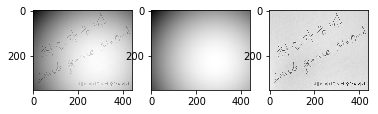

In [6]:
# background 와 원본을 빼줌.
img_n=img-img_b
print(img_n.shape)
print(img_n)
plt.subplot(131)
plt.imshow(img,cmap=plt.get_cmap('gray'))
plt.subplot(132)
plt.imshow(img_b,cmap=plt.get_cmap('gray'))
plt.subplot(133)
plt.imshow(img_n,cmap=plt.get_cmap('gray'))
plt.show()

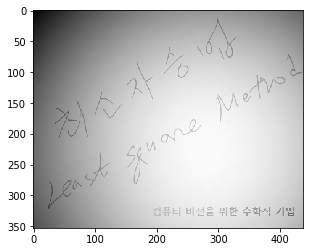

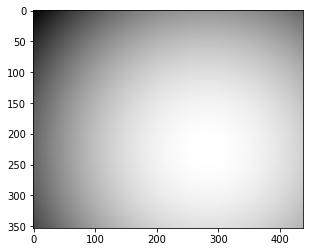

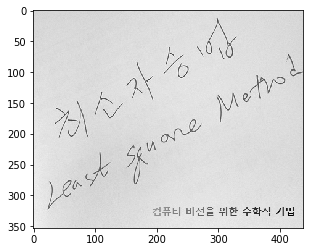

In [7]:
# Original 사진
plt.imshow(img,cmap=plt.get_cmap('gray'))
plt.show()
# background 사진
plt.imshow(img_b,cmap=plt.get_cmap('gray'))
plt.show()
# Original - background 사진
plt.imshow(img_n,cmap=plt.get_cmap('gray'))
plt.show()

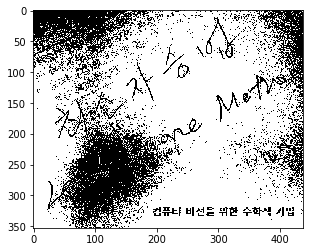

In [35]:
# Binarization 사진
# img_n으로 thresholding
# 각 픽셀에 접근하여 밝기 값의 평균을 구해봄(avg)
a,b= img_n.shape
cnt = 0
#img_nn = img_b-img
img_bi = np.zeros(img_n.shape)
for i in range(0,a):
    for j in range(b):
        cnt+=img_n[i,j]
avg = cnt/(353*438)   # 이미지 밝기 값의 평균
for i in range(a):
    for j in range(b):
        if (img_n[i,j]>avg):
            img_bi[i,j] = 255
        if (img_n[i,j]< avg):
            img_bi[i,j]= 0
plt.imshow(img_bi,cmap=plt.get_cmap('gray'))
plt.show()

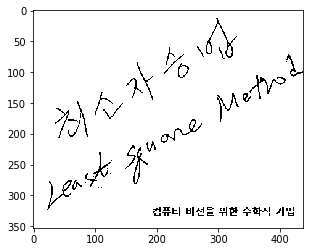

In [50]:
ret, dst = cv2.threshold(img_n,avg-5, 255, cv2.THRESH_BINARY)
plt.imshow(dst,cmap=plt.get_cmap('gray'))
plt.show()
